In [59]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


# overview

The dry bean, which is the most widely grown edible legume crop in the world has a wide variety of genetic variability. seed quality has a significant impact on crop production.
as a result seed classification in critical for both marketing and production in order to ensure that agricaltural system are viable in this report we used dry bean dataset(Link) that has measurement of 13611 bean sampeles to classify dry beans using three machine learning techiques the dataset has 7 different.
16 different measurements are available for each sample. namely dataset has 16 features: 
Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,	Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,	roundness,Compactness,ShapeFactor1,	ShapeFactor2,	ShapeFactor3,ShapeFactor4	
all features are numeric values.
the dataset is in csv form and the last column is class labels.

# !The project of making the best model for the dataset of dry beans

In [60]:
# steps Followed
# Reading data
# exploring and preparing the Data
# training a model on the data
# evaluating model performance
# improving model performance

In [61]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.datasets import make_classification

# Reading Data

In [62]:
Bean = pd.read_csv("Dry_Bean_Dataset.xlsx - Dry_Beans_Dataset.csv")
Bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [63]:
Bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [64]:
Bean["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

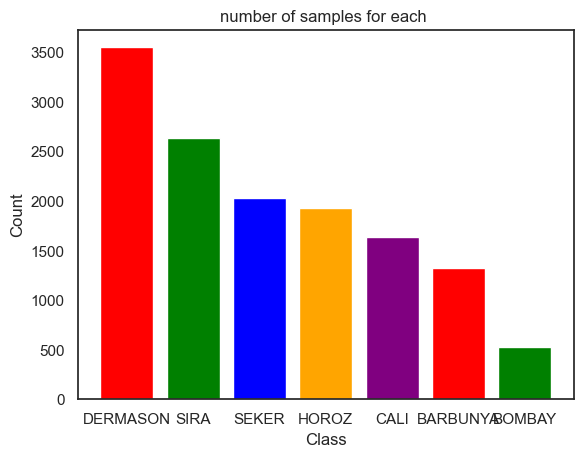

In [65]:
import matplotlib.pyplot as plt


colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(Bean["Class"].value_counts().index, Bean["Class"].value_counts().values, color=colors)


plt.xlabel("Class")
plt.ylabel("Count")
plt.title("number of samples for each ")

plt.show()

In [66]:
Bean.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


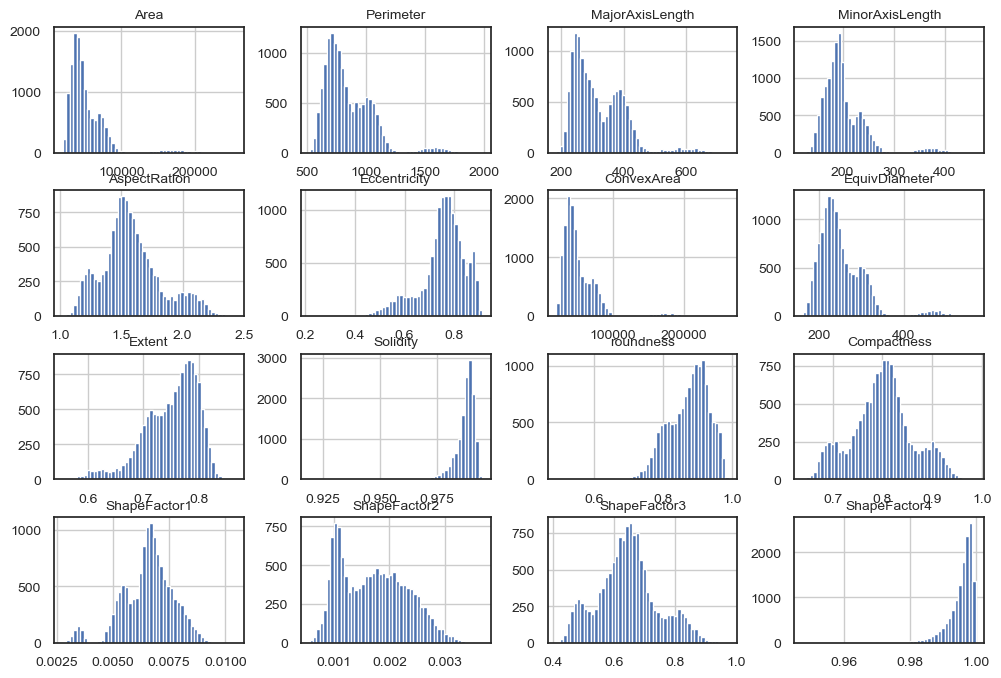

In [67]:
# Data Exploration

import matplotlib.pyplot as plt
#Bean.boxplot()
#Bean.hist()

plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Bean.hist(bins=50, figsize=(12, 8))

plt.show()

# Data Exploration

Looking for correlations:know the dataset is not too large. i considered computing the using the corre()method. the correlation coefficient ranges between -1 to 1.
when it is close to 1(vmax),it means that there is a strong positive correlation.
when the coefficient is close to -1(vmin),it means that there is a strong negative correlation.
while coefficients close to 0(center),means that there is no linear correlation


C:\Users\Fatemeh_NBT\AppData\Local\Temp\ipykernel_7080\1095693337.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(Bean.corr())
C:\Users\Fatemeh_NBT\AppData\Local\Temp\ipykernel_7080\1095693337.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = Bean.corr(method='pearson')


                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

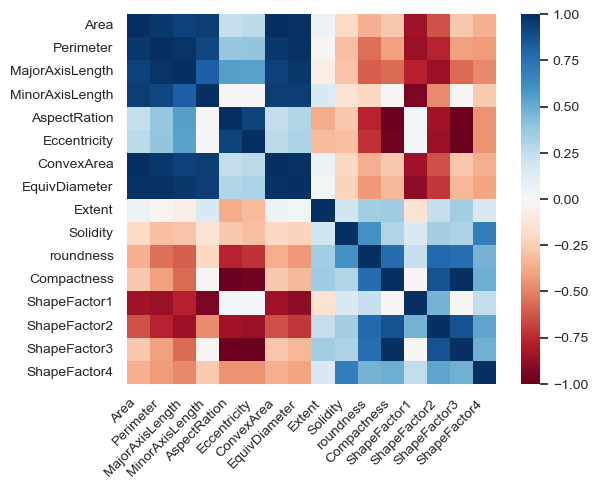

In [68]:
import seaborn as sns

print(Bean.corr())
correlationMatrix = Bean.corr(method='pearson')
ax = sns.heatmap(
    correlationMatrix,
    vmin=-1, vmax=1, center=0,
    cmap="RdBu",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

# Feature Selection

In [69]:
#create separate dataframe for all independent variables
independent_variables=['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
x=Bean[independent_variables]
print(type(x))
print(x)

# create separate dataframe for all independent variables
# target_variables='Class'
target_variables='Class'
y=Bean[target_variables]

print(type(y))
print(y)



<class 'pandas.core.frame.DataFrame'>
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Sol

# Classification to encode the target variable

In [70]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import pickle

independent_variables = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
x = Bean[independent_variables]

independent_variables_Ordinal = ['Class']
x_ordinal = Bean[independent_variables_Ordinal]
y = Bean[target_variables]

encOrdinalfeatures = preprocessing.OrdinalEncoder()
ordinalvalues = encOrdinalfeatures.fit_transform(x_ordinal)

pickle.dump(encOrdinalfeatures, open("encOrdinalfeatures.p", "wb"))

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoded_y = label_encoder.fit_transform(y)
print(label_encoder.classes_)
print(label_encoder.transform(label_encoder.classes_))

y = label_encoded_y
# Extra step in classification
# Save encoding of target variable
# Name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
dict_label_encoder = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print(dict_label_encoder)

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
{0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [72]:
print(type(x))
print(x)

print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Sol

# Normalization

In [73]:
from sklearn.preprocessing import MinMaxScaler


def getnormalizedData(x):
    # fit scaler on training data
    norm = MinMaxScaler().fit(x)
    # transform training data
    x_norm = norm.transform(x)
    x_train_norm = pd.DataFrame(x_norm, columns=x.columns.values)
    
    return x_train_norm;



In [74]:
# normalize x
# normalization typically meas rescales the values into a range of [0,1]
x_train_norm= getnormalizedData(x);
x_train_norm.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285
std,0.125212,0.146710,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406861,0.190064,0.302997,0.884146
50%,0.103469,0.184992,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698
75%,0.174691,0.309781,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# convert to numpy array
import numpy as np
x_numpy = np.array(x_train_norm)
y_numpy = np.array(y)

print(type(x_numpy))
print(type(y_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Data splitting

In [76]:
from sklearn.model_selection import train_test_split

# train is 80 , test is 20
x_train,x_test , y_train, y_test =  train_test_split(x_numpy,  y_numpy , test_size=0.15 , random_state=1)
x_train,x_val , y_train, y_val = train_test_split(x_train,  y_train , test_size=0.05 , random_state=1)


In [77]:
print(y_train)
print(x_train)
print(x_test)
print(y_test)

[2 1 0 ... 5 3 6]
[[0.23259577 0.38265301 0.44146621 ... 0.12454813 0.19213005 0.82882631]
 [0.69772754 0.73234431 0.71790657 ... 0.11842765 0.49627547 0.96867928]
 [0.20340228 0.3627774  0.31720367 ... 0.28953071 0.45934664 0.90011095]
 ...
 [0.11916087 0.19052343 0.1919934  ... 0.45571979 0.56741967 0.9812276 ]
 [0.02914653 0.05838766 0.08042408 ... 0.55690363 0.45265484 0.97683826]
 [0.08467694 0.15826963 0.18303981 ... 0.37741662 0.38901705 0.94728313]]
[[0.15894379 0.2687292  0.31837909 ... 0.21523347 0.2742095  0.89528434]
 [0.08081265 0.14634672 0.17382288 ... 0.39536025 0.40415135 0.97413304]
 [0.07469385 0.13419652 0.15344755 ... 0.44757107 0.45663421 0.91993825]
 ...
 [0.04282311 0.08389439 0.10856869 ... 0.49498763 0.4277952  0.97614548]
 [0.06462536 0.11821647 0.09839994 ... 0.6660458  0.68611675 0.98141492]
 [0.21717707 0.34295724 0.38933308 ... 0.17783667 0.27908715 0.68296195]]
[6 3 3 ... 3 5 2]


# let's train of different models on this prepared dataset

In [78]:
#first model
#Using GridSearchCV

The GridSearchCV method is based on performing a linear search in the parameter space. The parameter space is defined by the user and contains all possible combinations for the parameters. Then, for each combination of parameters, the desired model is trained using the training data set and the performance of the model is measured using a specific evaluation method (such as cross-validation).

In addition to selecting the best model, GridSearchCV also provides the possibility to evaluate the performance of the model using optimal parameter values. In addition, it can provide useful information such as the best parameter values and model performance when the final model is applied to real test data.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Model definition
svm_model = SVC()

# Define the parameters space for searching
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create network search object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=True, n_jobs=1)

# Running network search on training and validation data
grid_search.fit(x_train, y_train)

# Get the best parameters and the model with the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Show the best parameters
print("Best Parameters:", best_params)

# Calculation of model accuracy with the best parameters on training and validation data
train_accuracy = best_model.score(x_train, y_train)
val_accuracy = best_model.score(x_val, y_val)
# Calculate the accuracy of the model with the best parameters on the test data
test_accuracy = best_model.score(x_test, y_test)

# Display model accuracy
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
# Show the accuracy of the model on the test data
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtaining model predictions on test data
y_pred = best_model.predict(x_test)

# Calculating the clutter matrix
cm = confusion_matrix(y_test, y_pred)

# Chart settings
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of classes
num_classes = len(np.unique(y_test))

# Draw a 3D diagram of the entanglement matrix
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
cm = confusion_matrix(y_test, y_pred)
x_data, y_data = np.meshgrid(np.arange(num_classes), np.arange(num_classes))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = cm.flatten()

ax.bar3d(x_data, y_data, np.zeros_like(z_data), 1, 1, z_data)

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_zlabel('Count')

plt.title('Confusion Matrix')
plt.show()

# Calculate the correct and incorrect percentage of each class
class_correct = np.diag(cm)
class_total = np.sum(cm, axis=1)
class_accuracy = class_correct / class_total

# Display the correct and incorrect percentage of each class
for i in range(num_classes):
    print("Accuracy for class", i, ":", class_accuracy[i])

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculating the clutter matrix for test data
y_pred = best_model.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate percentages
total_samples = len(y_test)
percentages = confusion_mat / total_samples

# show
labels = ['Negative', 'Positive']

for label_true, row in zip(labels, percentages):
    for label_pred, value in zip(labels, row):
        print(f"{label_true} {label_pred} Percentage: {value:.2%}")

# Another model

It uses the Randomized Search algorithm to find the best parameters for the RandomForestClassifier model. Using a set of parameters and the number of iterations (n_iter), this algorithm performs a search in the parameter space and selects the best parameters based on the specified evaluation criteria.

In [ ]:

# create model with best hyperparameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = {
    "n_estimators": [50,100, 200,300, 400,500, 600, 800,900, 1000],
    "max_depth": [3,4,5, 6,7,8, 9,11, 12],
    "max_samples": [100,200,250, 1000,3000, 5000,7000, 9000],
    "max_features": [1,3,5,6,7, 8,9,10, 11],
    "criterion": ["gini", "entropy"]
}

num_trees = 50

rf_model = RandomForestClassifier( max_features=8, max_depth=9,max_samples=1000, random_state=1,n_estimators=num_trees)

rf_model = RandomForestClassifier()
randomizedSearchCV = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, n_jobs=1 , random_state=1
)

randomizedSearchCVresults = randomizedSearchCV.fit(x_train, y_train)
print(f"best_score = {randomizedSearchCVresults.best_score_}, best_hyperparameters = {randomizedSearchCVresults.best_params_}")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# train the first model
rf_model.fit(x_train , y_train)
print("makinge predictions for the following in train set:")
predicted_values = rf_model.predict(x_train[0:10,:])
true_values = y_train[0:10]

print("true_values are" , true_values)
print("the predict values are" , predicted_values)
print("diff" , abs(predicted_values-true_values))

print("makinge predictions for the following in testing set:")
predicted_values = rf_model.predict(x_test[0:10,:])
true_values = y_test[0:10]

print("true_value are " , true_values)
print("the predict value are" , predicted_values)
print("diff" , abs(predicted_values-true_values))

dftrain=y_train-rf_model.predict(x_train)
print("Average Absolute Error (Training):" , np.absolute(dftrain).mean())
#Average test error
dftest=y_test-rf_model.predict(x_test)
print("Average Absolute Error (Testing):" , np.absolute(dftest).mean())
#Accuracy score in testing set
testing_accuracy = accuracy_score (true_values, predicted_values, normalize=False)
print("Accuracy score in testing set",testing_accuracy)

In [ ]:
#plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


train_pred = rf_model.predict(x_train)
train_cm = confusion_matrix(y_train, train_pred)


test_pred = rf_model.predict(x_test)
test_cm = confusion_matrix(y_test, test_pred)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="RdBu")
plt.title("Train")
plt.xlabel("predicted lable")
plt.ylabel("True Lable")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="RdBu")
plt.title("Test")
plt.xlabel("predicted lable")
plt.ylabel("True Lable")

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Average training_accuracy
training_accuracy = accuracy_score (y_train , rf_model.predict(x_train))
print("training_accuracy ",training_accuracy )
# Average testing_accuracy
testing_accuracy = accuracy_score (y_test , rf_model.predict(x_test))
print("testing_accuracy", testing_accuracy)
